In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

import urllib

</div>
<div class="1.1 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h2>1. Data acquisition</h2>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Here we load the relevant data using the <span style="font-family: monospace">pandas</span> library. The data we are dealing with follows a relational model. The specific navigation paths can be represented as graphs where the nodes concern the wikipedia pages that are connected through (directional) edges representing the hyperlinks.
    </span>
</div>

In [2]:
#Import relevant DataFrames

#Articles data
articles = pd.read_csv("data/articles.tsv", skiprows=11, names=["article"])
articles['article'] = articles['article'].apply(urllib.parse.unquote) #Parsing URL encoding

#Category data
categories = pd.read_csv("data/categories.tsv", sep="\t", skiprows=12, names=["article", "category"])
categories["article"] = categories["article"].apply(urllib.parse.unquote) #Parsing URL encoding

#Links data
links = pd.read_csv("data/links.tsv", sep="\t", skiprows=11, names=["article", "link"])
links["article"] = links["article"].apply(urllib.parse.unquote) #Parsing URL encoding
links["link"] = links["link"].apply(urllib.parse.unquote) #Parsing URL encoding

#Finished paths
paths_finished = pd.read_csv("data/paths_finished.tsv", sep="\t", skiprows=15, names=["hashedIpAddress",
                                                                                      "timestamp",
                                                                                      "durationInSec",
                                                                                      "path",
                                                                                      "rating"])
paths_finished["path"] = paths_finished["path"].apply(urllib.parse.unquote) #Parsing URL encoding

#Unfinished paths
paths_unfinished = pd.read_csv("data/paths_unfinished.tsv", sep="\t", skiprows=16, names=["hashedIpAddress",
                                                                                          "timestamp",
                                                                                          "durationInSec",
                                                                                          "path",
                                                                                          "target",
                                                                                          "type"])
paths_unfinished["path"] = paths_unfinished["path"].apply(urllib.parse.unquote) #Parsing URL encoding
paths_unfinished["target"] = paths_unfinished["target"].apply(urllib.parse.unquote) #Parsing URL encoding

#shortest path matrix
with open('data/shortest-path-distance-matrix.txt', 'r') as file:
    
    #Initialize shortest_path_distance list
    shortest_path_distance = []
    
    for line in file:
        
        #Check if the first character of the line is either a digit or underscore
        if re.search("([0-9]|_)", line[0]): 
            
            #Append list to shortest_path_distance
            shortest_path_distance.append([np.nan if x=='_' else int(x) for x in line.strip()])
    
#Convert to numpy ndarray
shortest_path_distance = np.array(shortest_path_distance)    
    


In [3]:
paths_finished

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,"Yarralumla,_Australian_Capital_Territory;Austr...",1.0


</div>
<div class="1.1 explanation" style='background-color:#08135c; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:white">
       <h2>2. Data exploration</h2>
    </span>
</div>
</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        We will now explore the data. We start by investigation the category distribution among the wikipedia articles.
    </span>
</div>

Number of articles	: 4604
Number of categories	: 129

TOP 3:
CATEGORY                                      COUNT
subject.Countries                            : 229
subject.Science.Biology.Birds                : 161
subject.Geography.Geography_of_Great_Britain : 124




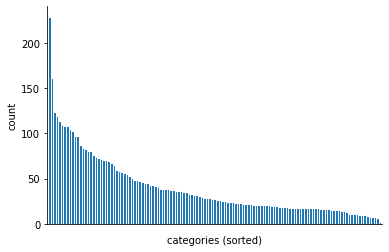

In [4]:
#Get number of articles and number of unique categories
nb_articles = len(articles)
nb_categories = len(categories['category'].unique())

#Find number of articles per category
categories_grouped = categories.groupby('category').count().add_suffix('_count')
categories_grouped = categories_grouped.sort_values('article_count', ascending=False) #Sort by count in descending order

#Print statistics
print('Number of articles\t: {}'.format(nb_articles))
print('Number of categories\t: {}\n'.format(nb_categories))
print('TOP 3:')
print("{:<45} {}".format('CATEGORY', 'COUNT'))
for index, row in categories_grouped.head(3).iterrows():
    print("{:<45}: {}".format(index, row['article_count']))
print("\n")

#Plot category distrubution (sorted)
g = categories_grouped.plot(y='article_count', kind='bar', legend=False, width=1, edgecolor=(1,1,1))
g.set(ylabel='count')
g.set(xlabel='categories (sorted)')
g.set(xticklabels=[]);
g.tick_params(bottom=False);
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)


</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Now look at the distribution of the number of links per article
    </span>
</div>

Number of links	: 119882

TOP 3:
ARTICLE                                       COUNT
United_States                                : 294
Driving_on_the_left_or_right                 : 255
List_of_countries                            : 244




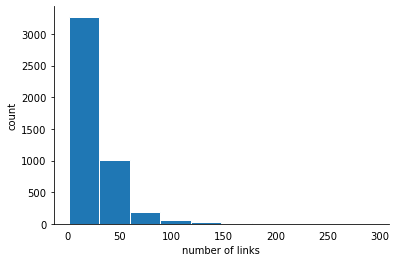

In [5]:
nb_links = len(links)

links_grouped = links.groupby('article').count().add_suffix('_count')
links_grouped = links_grouped.sort_values('link_count', ascending=False) #Sort by count in descending order

#Print statistics
print('Number of links\t: {}\n'.format(nb_links))

print('TOP 3:')
print("{:<45} {}".format('ARTICLE', 'COUNT'))
for index, row in links_grouped.head(3).iterrows():
    print("{:<45}: {}".format(index, row['link_count']))
print("\n")

    
#Plot category distrubution (sorted)
g = links_grouped.plot(y='link_count', kind='hist', legend=False, edgecolor=(1,1,1))
g.set(ylabel='count')
g.set(xlabel='number of links')
g.tick_params(bottom=False);
g.spines['right'].set_visible(False)
g.spines['top'].set_visible(False)


</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Check if the distribution of the number of links per article or the number of article by categories follows a power law. We can see form the histograms that they don't.
    </span>
</div>

<AxesSubplot:>

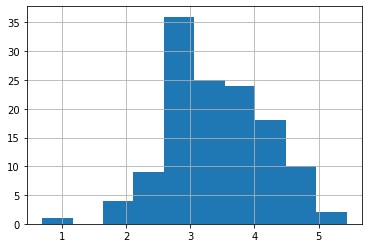

In [6]:
np.log(categories_grouped['article_count']).hist()

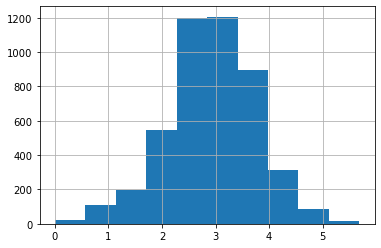

In [7]:
g = np.log(links_grouped['link_count']).hist()

</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Data exploration to the paths <b>(will continue this later)</b>
    </span>
</div>

In [8]:
#CODE HERE

</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Quick visualization of the short distance matrix. The orange stripes represent the articles that cannot be reached. Strikingly, these orange lines seems to be isolated from almost all articles. This would imply no article has a hyperlink to this wikipedia page?
    </span>
</div>

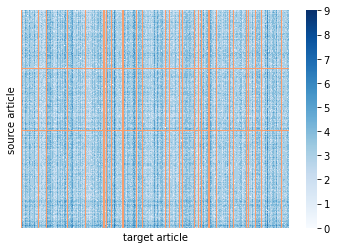

In [9]:
g = sns.heatmap(shortest_path_distance, xticklabels=False, yticklabels=False, linewidths=0, cmap='Blues');
g.set_facecolor('#f79d6f');
g.set(ylabel='source article');
g.set(xlabel='target article');

</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        With the bootstrap algorithm the differences of the time between unfinished path (differentiation between timeout and restart) and finished paths
    </span>
</div>

In [10]:
def bootstrap_CI(data, nbr_draws, with_means = False):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)
    if with_means :
        return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)], means
    else : 
        return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]
    

In [11]:
# Add the length of the paths
paths_unfinished['pathLength'] = paths_unfinished['path'].apply(lambda x : len(str(x).split(';')))
paths_finished['pathLength'] = paths_unfinished['path'].apply(lambda x : len(str(x).split(';')))
paths_unfinished.head()

,hashedIpAddress,timestamp,durationInSec,path,target,type,pathLength
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout,1
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout,1
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout,3
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart,1
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout,2


In [12]:
#split the unfinished paths in timeout and restart
unfinished_timeout = paths_unfinished[paths_unfinished['type'] == 'timeout']
unfinished_restart = paths_unfinished[paths_unfinished['type'] == 'restart']
print('size of unfinished paths with timeout: ', len(unfinished_timeout))
print('size of unfinished paths with restart: ', len(unfinished_restart))
print('size of finished paths with restart: ', len(paths_unfinished))

size of unfinished paths with timeout:  9323
size of unfinished paths with restart:  15552
size of finished paths with restart:  24875


Cut outliers and change range for timeout

In [13]:
# Cutting outliers
range_outlier = 1.5
Q1 = unfinished_timeout['durationInSec'].quantile(0.25)
Q3 = unfinished_timeout['durationInSec'].quantile(0.75)
IQR = Q3 - Q1
lower_value = unfinished_timeout['durationInSec'].median() - IQR*range_outlier
upper_value = unfinished_timeout['durationInSec'].median() + IQR*range_outlier


unfinished_timeout_cut = unfinished_timeout[unfinished_timeout['durationInSec']>=lower_value]
unfinished_timeout_cut = unfinished_timeout_cut[unfinished_timeout_cut['durationInSec']<=upper_value]


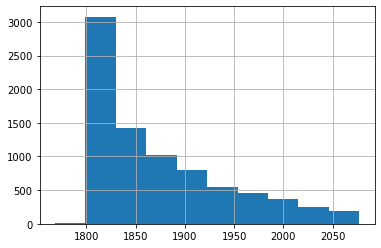

In [14]:
#change values of timeout by the minimum timestamp
unfinished_timeout_cut['durationInSec'].hist()
unfinished_timeout_cut['durationInSec'] = unfinished_timeout_cut['durationInSec']-unfinished_timeout_cut['durationInSec'].min()

In [15]:
colors = [('black', 'gray'), ('blue', 'cornflowerblue'), ('red', 'lightcoral'), ('darkorange', 'bisque'), ('lawngreen','palegreen'), ('cyan','paleturquoise'), ('violet', 'thistle')]
ci_finished, stats_finished = bootstrap_CI(paths_finished['durationInSec'], 10000, True)
ci_notfiniti, stats_notfiniti = bootstrap_CI(unfinished_timeout_cut['durationInSec'], 10000, True)
ci_notfinires, stats_notfinires = bootstrap_CI(unfinished_restart['durationInSec'], 10000, True)


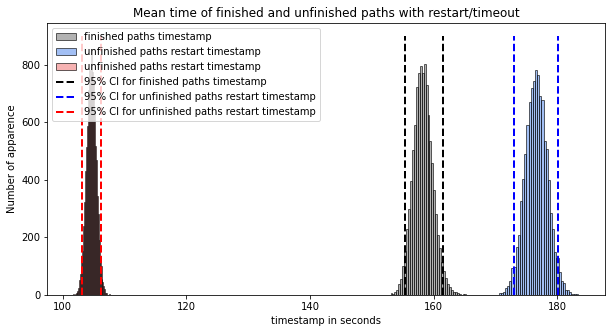

In [16]:
plt.figure(figsize=(10,5))
plt.hist(stats_finished, bins=40, edgecolor = 'k', color=colors[0][1],alpha = 0.6, label = 'finished paths timestamp')
plt.vlines(ci_finished, 0,900, ls='--', color=colors[0][0], linewidth=2, label = '95% CI for finished paths timestamp')
plt.hist(stats_notfinires, bins=40, edgecolor = 'k', color=colors[1][1],alpha = 0.6, label = 'unfinished paths restart timestamp')
plt.vlines(ci_notfinires, 0,900, ls='--', color=colors[1][0], linewidth=2, label = '95% CI for unfinished paths restart timestamp')
plt.hist(stats_notfiniti, bins=40, edgecolor = 'k', color=colors[2][1],alpha = 0.6, label = 'unfinished paths restart timestamp')
plt.vlines(ci_notfiniti, 0,900, ls='--', color=colors[2][0], linewidth=2, label = '95% CI for unfinished paths restart timestamp')
plt.title('Mean time of finished and unfinished paths with restart/timeout')
plt.xlabel('timestamp in seconds')
plt.ylabel('Number of apparence')
plt.legend()

In [17]:
print('time median of finished paths: ',paths_finished['durationInSec'].median())
print('time mean of finished paths: ',paths_finished['durationInSec'].mean())

time median of finished paths:  107.0
time mean of finished paths:  158.27619938423166


</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        With the bootstrap algorithm the differences of the pathlength between unfinished path (differentiation between timeout and restart) and finished paths
    </span>
</div>

In [18]:
ci_finished, stats_finished = bootstrap_CI(paths_finished['pathLength'], 10000, True)
ci_notfiniti, stats_notfiniti = bootstrap_CI(unfinished_timeout['pathLength'], 10000, True)
ci_notfinires, stats_notfinires = bootstrap_CI(unfinished_restart['pathLength'], 10000, True)

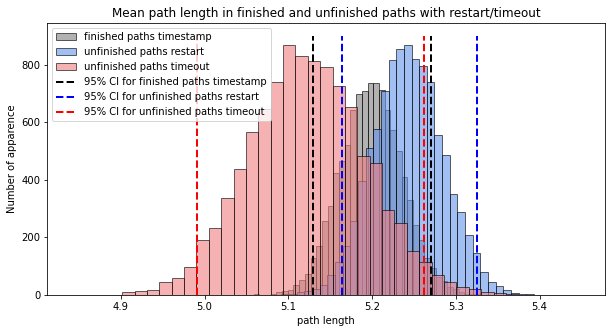

In [19]:
colors = [('black', 'gray'), ('blue', 'cornflowerblue'), ('red', 'lightcoral'), ('darkorange', 'bisque'), ('lawngreen','palegreen'), ('cyan','paleturquoise'), ('violet', 'thistle')]

plt.figure(figsize=(10,5))
plt.hist(stats_finished, bins=40, edgecolor = 'k', color=colors[0][1],alpha = 0.6, label = 'finished paths timestamp')
plt.vlines(ci_finished, 0,900, ls='--', color=colors[0][0], linewidth=2, label = '95% CI for finished paths timestamp')
plt.hist(stats_notfinires, bins=40, edgecolor = 'k', color=colors[1][1],alpha = 0.6, label = 'unfinished paths restart')
plt.vlines(ci_notfinires, 0,900, ls='--', color=colors[1][0], linewidth=2, label = '95% CI for unfinished paths restart')
plt.hist(stats_notfiniti, bins=40, edgecolor = 'k', color=colors[2][1],alpha = 0.6, label = 'unfinished paths timeout')
plt.vlines(ci_notfiniti, 0,900, ls='--', color=colors[2][0], linewidth=2, label = '95% CI for unfinished paths timeout')
plt.title('Mean path length in finished and unfinished paths with restart/timeout')
plt.xlabel('path length')
plt.ylabel('Number of apparence')
plt.legend()

regression-analysis between restart and timeout

</div>
<div class="1.1 explanation" style='background-color:#faefe1; border-left: solid #darkblue 4px; border-radius: 4px; padding:0.7em;'>
    <span style="color:black">
        Logistic regression to predict if the player give up or will restart by taking time and pathlength into account
    </span>
</div>

In [20]:
#prepare the data
unfinished_timeout = paths_unfinished[paths_unfinished['type'] == 'timeout']
unfinished_restart = paths_unfinished[paths_unfinished['type'] == 'restart']
reg_unfinished_tim = unfinished_timeout.copy()
reg_unfinished_res = unfinished_restart.copy()
reg_unfinished_tim['y'] = 1
reg_unfinished_res['y'] = 0
regression_data = pd.concat([reg_unfinished_tim,reg_unfinished_res])
regression_data_X = regression_data[['pathLength','durationInSec']]
regression_data_y = regression_data[['y']]

In [21]:
#import of lybraries
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [22]:
#standardization of the values
means = np.mean(regression_data_X,axis = 0)
stds = np.std(regression_data_X,axis = 0)
regression_data_X = (regression_data_X - means)/stds
regression_data_X['y']= regression_data_y
df_all = regression_data_X 

In [23]:
formula2 = 'y ~ pathLength + durationInSec'
mod = smf.logit(formula=formula2, data=df_all)
np.random.seed(2)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.012944
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                24875
Model:                          Logit   Df Residuals:                    24872
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 Nov 2022   Pseudo R-squ.:                  0.9804
Time:                        16:42:14   Log-Likelihood:                -321.99
converged:                       True   LL-Null:                       -16454.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -8.9115      0.770    -11.577      0.000     -10.420      -7.403
pathLength       -1